In [0]:
 import tensorflow as tf 
 from tensorflow import keras 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),   
                                 keras.layers.Dense(300, activation="relu"),     
                                 keras.layers.Dense(100, activation="relu"),     
                                 keras.layers.Dense(10, activation="softmax") ])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])


In [9]:
 history = model.fit(X_train, y_train, epochs=30, 
                     validation_data=(X_valid, y_valid)) 

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7203 - accuracy: 0.7633 - val_loss: 0.5167 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4934 - accuracy: 0.8276 - val_loss: 0.4528 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4451 - accuracy: 0.8432 - val_loss: 0.4518 - val_accuracy: 0.8402
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4172 - accuracy: 0.8531 - val_loss: 0.4087 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3957 - accuracy: 0.8617 - val_loss: 0.3870 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3789 - accuracy: 0.8667 - val_loss: 0.4116 - val_accuracy: 0.8594
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3647 - accuracy: 0.8707 - val_loss: 0.3615 - val_accuracy:

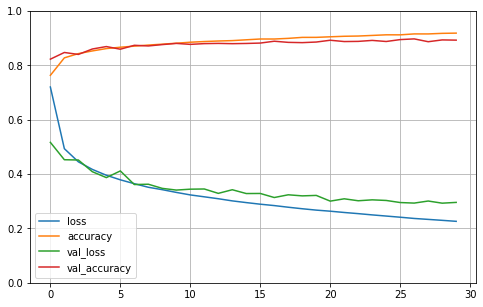

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) 
plt.gca().set_ylim(0, 1) # s e t t h e v e r t i c a l r a n g e t o [ 0 - 1 ]
plt.show()

In [11]:
 model.evaluate(X_test, y_test) 

313/313 [==============================] - 1s 2ms/step - loss: 72.1028 - accuracy: 0.8390


[72.10284423828125, 0.8389999866485596]

In [12]:
X_new = X_test[:3] 
y_proba = model.predict(X_new) 
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1) 
y_pred

array([9, 2, 1])

In [14]:
np.array(class_names)[y_pred] 

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [16]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(X_test[0])
z=cv2.resize(X_test[0],(28,28))
z = np.expand_dims(X_test[0],axis=0)
y_pred = np.argmax(model.predict(z), axis=-1) 
np.array(class_names)[y_pred] 

array(['Ankle boot'], dtype='<U11')

In [17]:
img1=cv2.imread('getty.jpg',0)
img1=cv2.resize(img1,(28,28))

cv2_imshow(img1)
img1 = np.expand_dims(img1,axis=0)


In [18]:
y_pred = np.argmax(model.predict(img1), axis=-1) 
np.array(class_names)[y_pred]

array(['T-shirt/top'], dtype='<U11')